# Actos de Terrorismo

En este Collab analizaremos los actos de terrorismo que se han realizado desde la decada de los 1970 hasta 2017

Datos obtenidos ->
https://www.kaggle.com/datasets/muhammetvarl/global-terrorism

Para mas información -> https://www.start.umd.edu/gtd/downloads/Codebook.pdf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

data_set = pd.read_csv( "globalterrorism.csv",engine="python", quotechar='"', sep = ",", encoding = "ISO-8859-1")

sns.set(style="ticks")

In [ ]:
#data_set

first_set = data_set[["iyear","country_txt","crit1","crit2","crit3","attacktype1_txt","claimmode_txt","targtype1_txt"]]
first_set

## Objetivos
Es nuestro objetivo el utilizar estos datos para visualizar los paises de mayor riesgo , el tipo de ataques realizado y las intenciones de los sujetos.

##Elementos de columna
Observamos los distintos tipos de columnas y el **significado de cada columna** para elejir que datos nos queremos quedar. En este caso como tenemos 135 columnas en nuestro CSV solo vamos a trabajar con las que listare a continuación.

*   Año del incidente
*   Pais donde ocurrio el incidente
*   Motivacion [1 , 2 , 3] siendo tres columnas para definir la motivacion
*   Tipo de ataque
*   Quien se declaro responsable del ataque
*   Objetivo del ataque


El PDF que aporte al inicio contiene una descripcion detallista de cada una de las columnas y el significado de sus valores.
https://www.start.umd.edu/gtd/downloads/Codebook.pdf


In [ ]:
first_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   iyear            181691 non-null  int64 
 1   country_txt      181691 non-null  object
 2   crit1            181691 non-null  int64 
 3   crit2            181691 non-null  int64 
 4   crit3            181691 non-null  int64 
 5   attacktype1_txt  181691 non-null  object
 6   claimmode_txt    19083 non-null   object
 7   targtype1_txt    181691 non-null  object
dtypes: int64(4), object(4)
memory usage: 11.1+ MB


# Nº de ataques
Observamos los paises que han sufrido más ataques terroristas (historico y de ultimo año registrado)

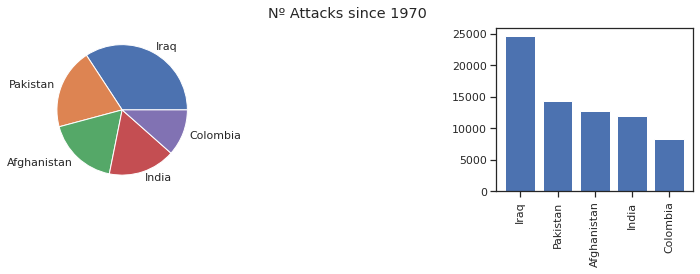

,country_txt,N_Total_Attacks
84,Iraq,24636
134,Pakistan,14368
0,Afghanistan,12731
80,India,11960
35,Colombia,8306


In [ ]:
most_atacked = data_set.groupby(["country_txt"])["country_txt"].count().reset_index(name="N_Total_Attacks").sort_values(by=['N_Total_Attacks'], ascending=False).head(5)
most_atacked

x_label = most_atacked.N_Total_Attacks
y_label = most_atacked.country_txt

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.pie(x_label, labels = y_label)
plt.subplot(133)
plt.bar(y_label, x_label)
plt.xticks(rotation='vertical')
plt.suptitle('Nº Attacks since 1970')
plt.show()

most_atacked


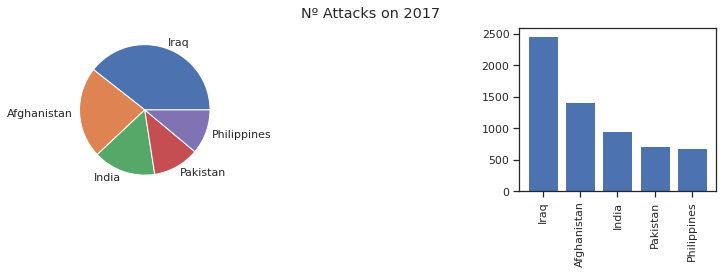

,country_txt,N_Total_Attacks
38,Iraq,2466
0,Afghanistan,1414
35,India,966
67,Pakistan,719
71,Philippines,692


In [ ]:
most_atacked_last_year = data_set[data_set["iyear"]==2017]
most_atacked_last_year = most_atacked_last_year.groupby(["country_txt"])["country_txt"].count().reset_index(name="N_Total_Attacks").sort_values(by=['N_Total_Attacks'], ascending=False).head(5)
most_atacked_last_year

x_label = most_atacked_last_year.N_Total_Attacks
y_label = most_atacked_last_year.country_txt

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.pie(x_label, labels = y_label)
plt.subplot(133)
plt.bar(y_label, x_label)
plt.xticks(rotation='vertical')
plt.suptitle('Nº Attacks on 2017')
plt.show()
most_atacked_last_year


# Historico de ataques
Odservamos las preferencias de tipo de ataque (historico y ultimo año registrado) ademas del numero de ataques por año

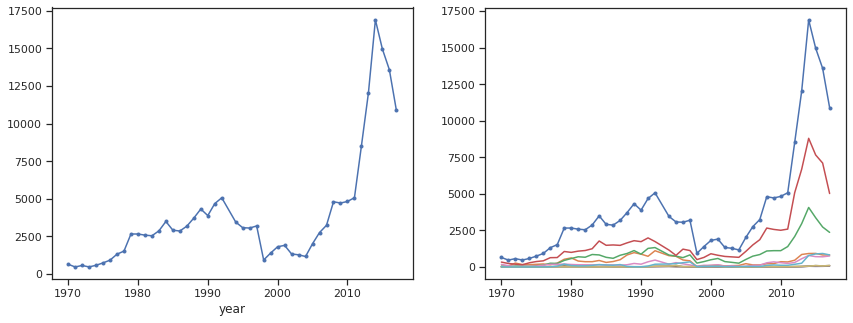

In [ ]:
# Para calcular el total de ataques
hystoric_record = data_set.groupby(["iyear"])["iyear"].count().reset_index(name="N_Atacks")
df = hystoric_record.sort_values(by=['iyear'], ascending=True)
x_label = df.iyear
y_label = df.N_Atacks


# Para calcular los tipos de ataques
assasination_attack = data_set[data_set["attacktype1"]==1].groupby(["iyear"])["attacktype1_txt"].count().reset_index(name="N_Atacks").sort_values(by=['iyear'], ascending=True)
armed_assault_attack = data_set[data_set["attacktype1"]==2].groupby(["iyear"])["attacktype1_txt"].count().reset_index(name="N_Atacks").sort_values(by=['iyear'], ascending=True)
bomb_explosion_attack = data_set[data_set["attacktype1"]==3].groupby(["iyear"])["attacktype1_txt"].count().reset_index(name="N_Atacks").sort_values(by=['iyear'], ascending=True)
hijacking_attack = data_set[data_set["attacktype1"]==4].groupby(["iyear"])["attacktype1_txt"].count().reset_index(name="N_Atacks").sort_values(by=['iyear'], ascending=True)
hostage_taking_barricade_attack = data_set[data_set["attacktype1"]==5].groupby(["iyear"])["attacktype1_txt"].count().reset_index(name="N_Atacks").sort_values(by=['iyear'], ascending=True)
hostage_taking_kidnap_attack = data_set[data_set["attacktype1"]==6].groupby(["iyear"])["attacktype1_txt"].count().reset_index(name="N_Atacks").sort_values(by=['iyear'], ascending=True)
facility_attack = data_set[data_set["attacktype1"]==7].groupby(["iyear"])["attacktype1_txt"].count().reset_index(name="N_Atacks").sort_values(by=['iyear'], ascending=True)
unarmed_attack = data_set[data_set["attacktype1"]==8].groupby(["iyear"])["attacktype1_txt"].count().reset_index(name="N_Atacks").sort_values(by=['iyear'], ascending=True)
unknow_attack = data_set[data_set["attacktype1"]==9].groupby(["iyear"])["attacktype1_txt"].count().reset_index(name="N_Atacks").sort_values(by=['iyear'], ascending=True)

#Creamos una grafica que mostrara la cantidad de ataques total a lo largo de los años y otra donde diferenciaremos con los tipos de ataques
plt.figure(figsize=(22, 5))

plt.subplot(131)
plt.plot(x_label, y_label, marker = '.')


plt.xlabel("Nº attacks")
plt.xlabel("year")
plt.subplot(132)
plt.plot(x_label, y_label, marker = '.')
plt.plot(assasination_attack.iyear , assasination_attack.N_Atacks)
plt.plot(armed_assault_attack.iyear , armed_assault_attack.N_Atacks)
plt.plot(bomb_explosion_attack.iyear , bomb_explosion_attack.N_Atacks)
plt.plot(hijacking_attack.iyear , hijacking_attack.N_Atacks)
plt.plot(hostage_taking_barricade_attack.iyear , hostage_taking_barricade_attack.N_Atacks)
plt.plot(facility_attack.iyear , facility_attack.N_Atacks)
plt.plot(unarmed_attack.iyear , unarmed_attack.N_Atacks)
plt.plot(unarmed_attack.iyear , unarmed_attack.N_Atacks)
plt.plot(unknow_attack.iyear , unknow_attack.N_Atacks)


plt.show()



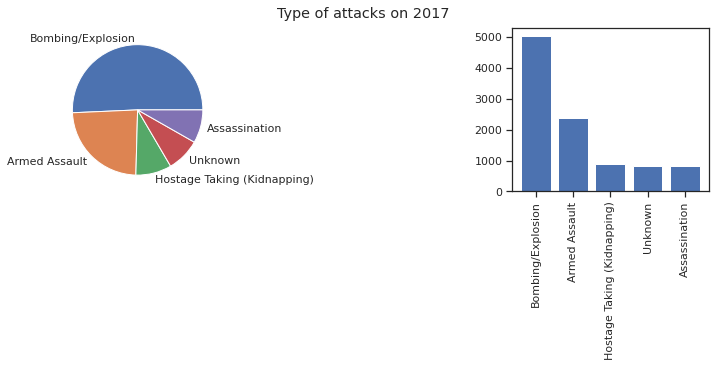

,attacktype1_txt,N_Total_Attacks
2,Bombing/Explosion,5024
0,Armed Assault,2365
6,Hostage Taking (Kidnapping),878
8,Unknown,825
1,Assassination,816


In [ ]:
most_atacked_type_last_year = data_set[data_set["iyear"]==2017]
most_atacked_type_last_year = most_atacked_type_last_year.groupby(["attacktype1_txt"])["attacktype1_txt"].count().reset_index(name="N_Total_Attacks").sort_values(by=["N_Total_Attacks"], ascending=False).head(5)
most_atacked_type_last_year

x_label = most_atacked_type_last_year.N_Total_Attacks
y_label = most_atacked_type_last_year.attacktype1_txt

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.pie(x_label, labels = y_label)
plt.subplot(133)
plt.bar(y_label, x_label)
plt.xticks(rotation='vertical')
plt.suptitle('Type of attacks on 2017')
plt.show()
most_atacked_type_last_year



# Motivacion

Hemos listado 
Observamos la cantidad de ataques con los criterios aportados en el ultimo año.


1.   The violent act must be aimed at attaining a political,economic, religious, or social goal. 
2.   To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or
convey some other message to a larger audience (or audiences) than the immediate
victims.
3.   The action is outside the context of legitimate warfare activities, insofar as it targets non-combatants.


In [ ]:
attack_intention_last_year = data_set[data_set["iyear"]==2017]
attack_intention_last_year = attack_intention_last_year.groupby(["crit1","crit2","crit3"])["attacktype1_txt"].count().reset_index(name="Counts_with_that_motive").sort_values(by=['Counts_with_that_motive'], ascending=False).head(20)
attack_intention_last_year.rename(columns = {'crit1':'Political/Economic/Religious/Social goal', 'crit2':'Coerce/Intimidate/Convey some other message',"crit3":"To non-combatans"}, inplace = True)
attack_intention_last_year

,Political/Economic/Religious/Social goal,Coerce/Intimidate/Convey some other message,To non-combatans,Counts_with_that_motive
3,1,1,1,8720
2,1,1,0,2009
0,0,1,1,111
1,1,0,1,60
